In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [5]:
df['price'].median()

437500.0

In [6]:
df.shape

(17206, 30)

In [28]:
df2 = df.loc[df['price']<1000000]

In [29]:
df2.shape

(16612, 30)

In [30]:
df2['sqft_living'].describe()

count    16612.000000
mean      1911.950879
std        709.094148
min        370.000000
25%       1370.000000
50%       1820.000000
75%       2360.000000
max       4750.000000
Name: sqft_living, dtype: float64

In [11]:
df2.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
1678,3066120030,2015-01-27,1580000.0,4,3.75,3810,9916,2.0,0.0,0.0,...,11250,31,31,0,1,0,8.476802,4.761186,4.761186,15.350095
1761,1118002090,2014-06-28,1600000.0,3,4.25,2820,7200,2.0,0.0,0.0,...,7522,90,90,1,0,0,4.160273,7.030144,4.160273,20.715971
1813,1118001370,2015-01-02,1570000.0,3,2.75,2340,8828,1.0,0.0,0.0,...,8526,66,66,0,0,1,4.366162,7.038426,4.366162,20.963495
1942,6448600060,2015-02-26,1550000.0,5,2.50,2450,20805,2.0,0.0,0.0,...,20324,57,57,0,0,1,8.386800,2.740106,2.740106,21.195409
2155,5026900160,2015-04-24,1600000.0,5,2.50,3100,5374,2.5,0.0,0.0,...,5800,114,114,0,1,0,3.993380,6.192375,3.993380,19.148545
2173,4389200796,2014-05-22,1600000.0,3,2.50,3160,12824,1.0,0.0,2.0,...,11985,54,54,1,0,1,8.962109,1.262219,1.262219,20.118251
2270,8722100570,2015-04-03,1600000.0,4,2.25,2940,5735,1.0,0.0,0.0,...,5659,63,63,1,1,1,4.077716,8.329304,4.077716,21.620549
2460,5701500030,2014-06-01,1510000.0,4,3.50,3480,7232,2.0,0.0,0.0,...,5642,94,10,0,1,1,4.122203,7.294531,4.122203,15.839320
2469,824059331,2014-11-08,1610000.0,5,3.75,3530,13260,2.0,0.0,0.0,...,13260,7,7,0,1,0,10.379755,3.822905,3.822905,16.419950
2782,1336800015,2014-05-21,1510000.0,4,3.25,3660,5800,2.5,0.0,0.0,...,5800,111,25,1,1,0,2.844947,8.573172,2.844947,20.545462


In [7]:
df1 = df.loc[df['price']>1000000]

In [8]:
df1.shape

(568, 30)

In [67]:
# Explore it
numerical_cols = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical_cols.append(col)

len(numerical_cols), numerical_cols

(29,
 ['id',
  'price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'yr_renovated',
  'zipcode',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15',
  'Age_of_House',
  'Years_last_renovation',
  'basement',
  'biggerliving',
  'biggerlot',
  'distance_from_seattle',
  'distance_from_bellevue',
  'distance_from_a_city',
  'distance_from_airport'])

In [68]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
0,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7639,69,29,1,1,0,12.613856,15.150174,12.613856,30.859494
1,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,8062,87,87,0,0,1,16.333282,14.375822,14.375822,33.112379
2,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,5000,55,55,1,1,0,10.617501,17.522706,10.617501,10.988905
3,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,7503,33,33,0,0,1,21.759524,11.683886,11.683886,27.230991
5,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,6819,25,25,0,0,0,33.155745,34.734685,33.155745,14.995397


In [69]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_lot15,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_seattle,distance_from_bellevue,distance_from_a_city,distance_from_airport
count,1.720600e+04,1.720600e+04,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.0,17206.000000,17206.000000,...,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000,17206.000000
mean,4.650405e+09,4.873325e+05,3.323492,2.042253,1954.306230,9860.708648,1.482186,0.0,0.091596,3.408346,...,9099.935371,49.482680,47.790771,0.373358,0.438045,0.386726,17.886364,16.850122,14.870008,21.159974
std,2.867533e+09,2.368968e+05,0.854325,0.691908,742.078156,11532.272734,0.539047,0.0,0.399916,0.647844,...,9098.780832,29.504455,29.167783,0.483710,0.496161,0.487014,9.770738,8.240600,9.041767,9.315940
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.0,0.000000,1.000000,...,651.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.235977,0.303167,0.303167,0.973432
25%,2.202500e+09,3.150000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.0,0.000000,3.000000,...,5000.000000,24.000000,22.000000,0.000000,0.000000,0.000000,9.645574,11.513188,8.041713,13.087372
50%,4.021100e+09,4.375000e+05,3.000000,2.000000,1850.000000,7344.000000,1.000000,0.0,0.000000,3.000000,...,7408.000000,46.000000,44.000000,0.000000,0.000000,0.000000,16.359897,15.112147,12.704614,21.375655
75%,7.368725e+09,6.033750e+05,4.000000,2.500000,2420.000000,9886.000000,2.000000,0.0,0.000000,4.000000,...,9600.000000,69.000000,67.000000,1.000000,1.000000,1.000000,24.688700,20.114227,18.902160,28.252749
max,9.900000e+09,1.650000e+06,6.000000,4.250000,4750.000000,137214.000000,3.000000,0.0,2.000000,5.000000,...,94960.000000,120.000000,120.000000,1.000000,1.000000,1.000000,49.716043,44.471316,44.471316,47.542201


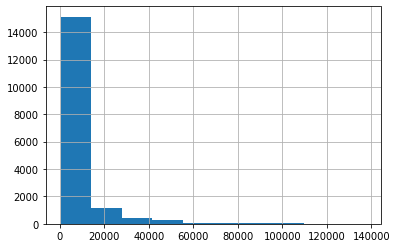

In [70]:
df['sqft_lot'].hist()

In [71]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Age_of_House',
       'Years_last_renovation', 'basement', 'biggerliving', 'biggerlot',
       'distance_from_seattle', 'distance_from_bellevue',
       'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [72]:
corr = df.drop('price',axis=1).corr()

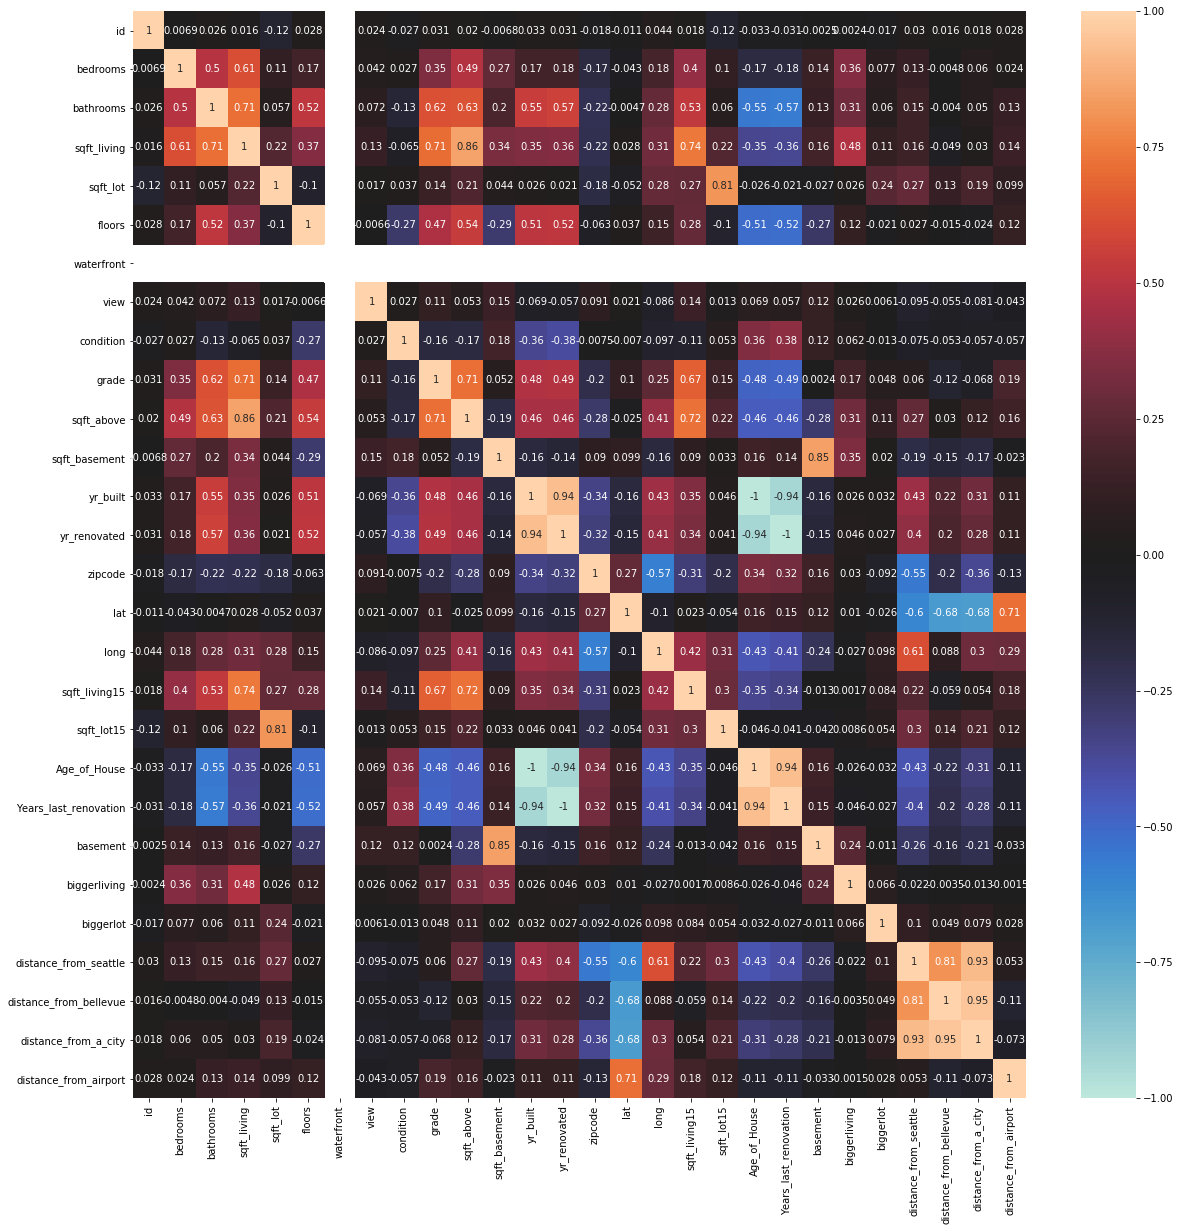

In [73]:
# Your code here
plt.figure(figsize=(20,20))
sns.heatmap(corr, center=0, annot=True);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [74]:
# Deleting Columns I think will be an issue

In [75]:
df.drop(['yr_built','yr_renovated','id','sqft_above','sqft_basement','lat','long','distance_from_seattle','distance_from_bellevue','sqft_living15','sqft_lot15'],axis=1,inplace = True)

In [76]:
corr1 = df.drop('price',axis=1).corr()

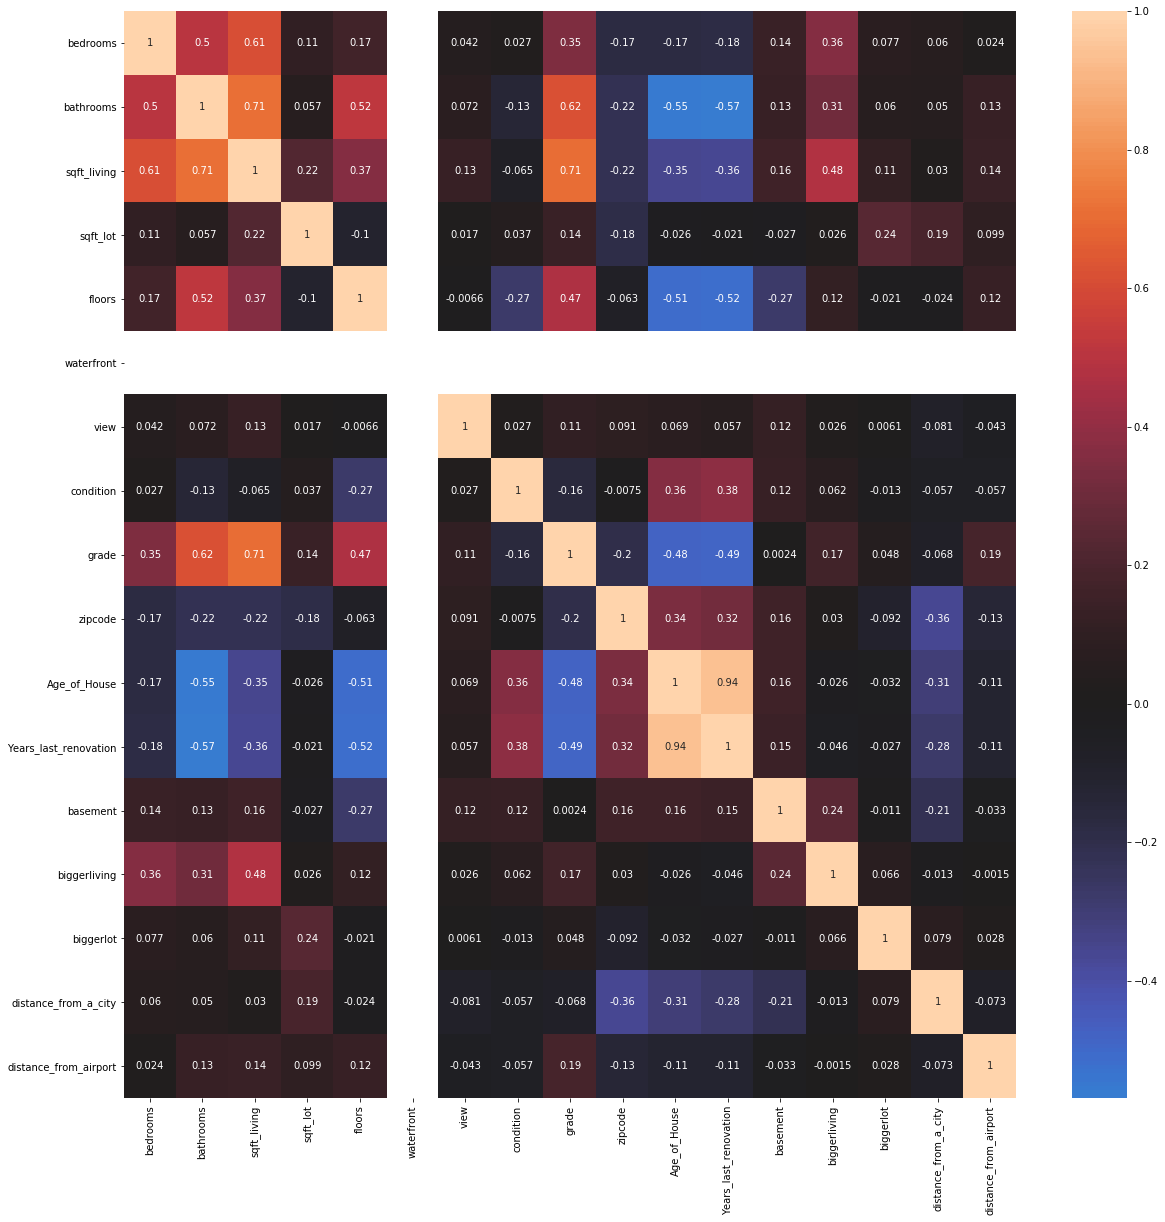

In [77]:
# Your code here
plt.figure(figsize=(20,20))
sns.heatmap(corr1, center=0, annot=True);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [78]:
# Explore it
numerical_cols = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical_cols.append(col)

len(numerical_cols), numerical_cols

(18,
 ['price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'zipcode',
  'Age_of_House',
  'Years_last_renovation',
  'basement',
  'biggerliving',
  'biggerlot',
  'distance_from_a_city',
  'distance_from_airport'])

In [79]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [80]:
numericals = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','Age_of_House', 'Years_last_renovation','distance_from_a_city', 'distance_from_airport']

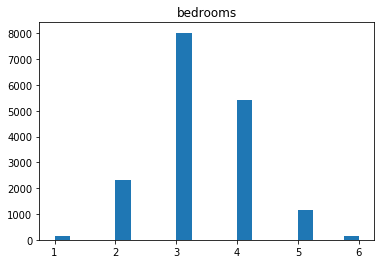

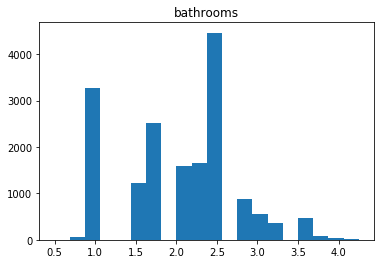

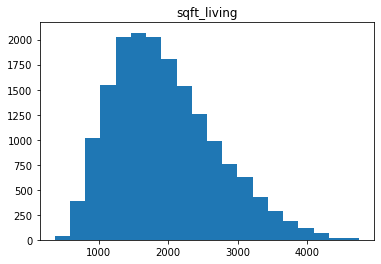

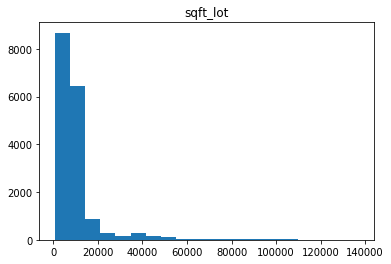

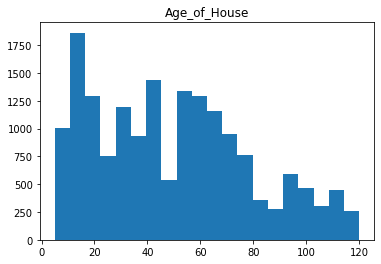

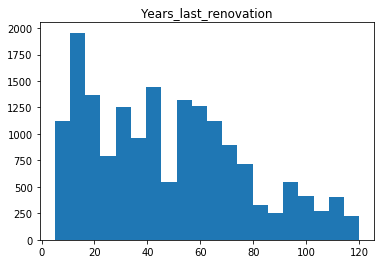

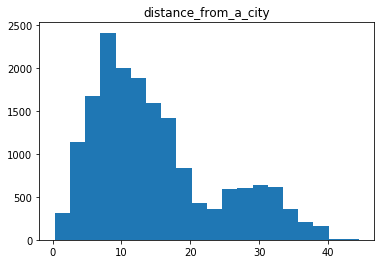

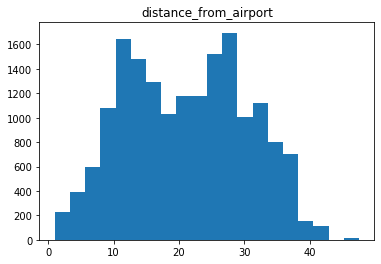

In [81]:
for col in numericals:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()

In [44]:
numericals

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_a_city',
 'distance_from_airport']

In [82]:
df.to_csv('data_correlation_gone.csv')

In [59]:
numericals = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','Age_of_House', 'Years_last_renovation','distance_from_a_city', 'distance_from_airport']

In [60]:
def norm_feat(series):
    return (series - series.mean())/series.std()


In [61]:
for feat in numericals:
    df[feat] = norm_feat((df[feat]))


In [62]:
df.reset_index(drop=True,inplace=True)

In [63]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


In [64]:
df.to_csv('data_correlation_gone_norm.csv')